**Credit Card Customer Churn Using ANN (Artificial Nueral Network)**

**Project Report**
1.  Classification Problem
2.  10K Records and 14 features and Exited Column is Target feature
3.  Its implace dataset but here we are just learning back propagation in nueral network and not the purpose to solve actual problem





In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df=pd.read_csv('Churn_Modelling.csv')

In [73]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [74]:
df.shape

(10000, 14)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [76]:
df.duplicated().sum()

np.int64(0)

In [77]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


**Pre Processing**
1. Drop unnecessarily column (RowNumber,CustomerId,Surname)
2. One hot-encoding for categorical column(Geography,Gender)
3. Scalling the feature for model.

In [78]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [79]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [80]:
df.shape

(10000, 11)

In [81]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [82]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [83]:
X=df.drop(columns=['Exited'])
y=df['Exited']

In [84]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [85]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1) # 20% for testing and 80% for training.

In [87]:
X_train.shape

(8000, 11)

In [88]:
y_train.shape

(8000,)

In [90]:
X_test.shape

(2000, 11)

In [91]:
y_test.shape

(2000,)

In [92]:
from sklearn.preprocessing import StandardScaler
scaled=StandardScaler()
X_train_scaled=scaled.fit_transform(X_train)
X_test_scaled=scaled.transform(X_test)

In [93]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [94]:
X_test_scaled

array([[-1.03768121,  0.77498705, -1.0482813 , ..., -0.58312392,
        -0.57273139,  0.91509065],
       [ 0.30708683, -0.46686456, -0.70174202, ..., -0.58312392,
        -0.57273139,  0.91509065],
       [-1.23422423,  0.29735181, -1.0482813 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       ...,
       [-0.86182692, -0.46686456,  1.72403288, ..., -0.58312392,
         1.74601919,  0.91509065],
       [-0.30323097, -0.84897275, -1.0482813 , ...,  1.71490137,
        -0.57273139, -1.09278791],
       [ 0.04847759,  1.25262228,  1.3774936 , ...,  1.71490137,
        -0.57273139,  0.91509065]])

**Model Training**

In [96]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [139]:
model=Sequential()

# hidden layer activation function (sigmoid), input=11
model.add(Dense(3,activation='sigmoid',input_dim=11))

# output layer with single output
model.add(Dense(1,activation='sigmoid'))

In [138]:
# hidden layer param : 11*3+3=36
# output layer param : 3*1+1=4
# total param : 36+4=40
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [140]:
# model compilation
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [144]:
history=model.fit(X_train_scaled,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8213 - loss: 0.4230 - val_accuracy: 0.8194 - val_loss: 0.4225
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8251 - loss: 0.4146 - val_accuracy: 0.8200 - val_loss: 0.4217
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8304 - loss: 0.4105 - val_accuracy: 0.8219 - val_loss: 0.4210
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8314 - loss: 0.4178 - val_accuracy: 0.8225 - val_loss: 0.4203
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8284 - loss: 0.4205 - val_accuracy: 0.8231 - val_loss: 0.4197
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8290 - loss: 0.4112 - val_accuracy: 0.8238 - val_loss: 0.4192
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8214 - loss: 0.4276 - val_accuracy: 0.8244 - val_loss: 0.4186
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8263 - loss: 0.4179 - val_accuracy: 0.

In [145]:
history.history

{'accuracy': [0.8243749737739563,
  0.824999988079071,
  0.8256250023841858,
  0.8282812237739563,
  0.828125,
  0.8284375071525574,
  0.8284375071525574,
  0.8285937309265137,
  0.8292187452316284,
  0.8298437595367432],
 'loss': [0.4198017418384552,
  0.4190686345100403,
  0.4184509515762329,
  0.41786545515060425,
  0.4172865152359009,
  0.4168093204498291,
  0.4163077175617218,
  0.41579440236091614,
  0.4153907299041748,
  0.41496914625167847],
 'val_accuracy': [0.8193749785423279,
  0.8199999928474426,
  0.8218749761581421,
  0.8224999904632568,
  0.8231250047683716,
  0.8237500190734863,
  0.8243749737739563,
  0.8256250023841858,
  0.824999988079071,
  0.8243749737739563],
 'val_loss': [0.4224510192871094,
  0.4216955304145813,
  0.42100533843040466,
  0.4203086197376251,
  0.419718474149704,
  0.41920045018196106,
  0.4186277687549591,
  0.41817420721054077,
  0.41774794459342957,
  0.41724181175231934]}

**Model graph with 10 epoch with sigmoid**

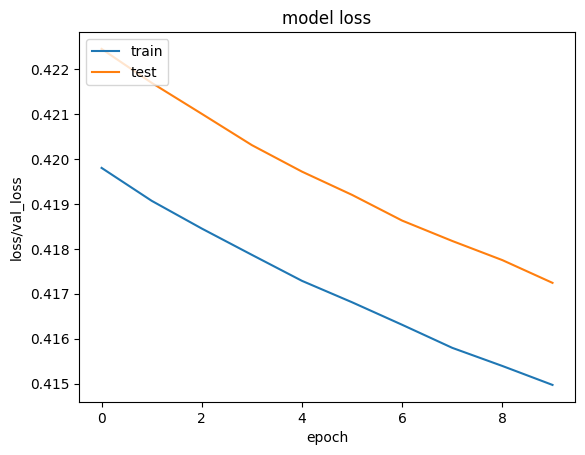

In [148]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss/val_loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

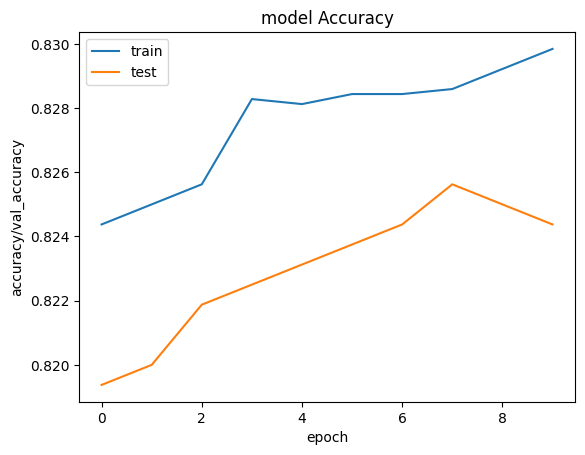

In [151]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('accuracy/val_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

**Model Prediction**

In [103]:
# so sigmoid return probability while requirement is to 1 or 0
model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.1297273 ],
       [0.15331805],
       [0.14527826],
       ...,
       [0.08108845],
       [0.13873234],
       [0.36597872]], dtype=float32)

In [104]:
# 0.5 is thresold for above set 1 below 0
y_log=model.predict(X_test_scaled)
y_pred=np.where(y_log>0.5,1,0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [105]:
# Here is output
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

**Model Accuracy**

In [106]:
import sklearn
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.801

**Improve Model Accuracy**
1. We use relu activation function (relue best perform in hidden layer that's why we use it.)
2. Increase number of nodes in hidden to increase as well add one more hidden layer
3. Increase number of epocs to 100.

In [133]:
model_improve=Sequential()
#  add one more layer as well increase layer also relu
model_improve.add(Dense(11,activation='relu',input_dim=11))
model_improve.add(Dense(11,activation='relu'))
# output layer with single output
model_improve.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [134]:
model_improve.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [135]:
# model compilation
model_improve.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [136]:
# increase epocs to 100
new_history=model_improve.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7608 - loss: 0.5561 - val_accuracy: 0.8031 - val_loss: 0.4619
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8039 - loss: 0.4572 - val_accuracy: 0.8025 - val_loss: 0.4356
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8112 - loss: 0.4245 - val_accuracy: 0.8081 - val_loss: 0.4264
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8132 - loss: 0.4209 - val_accuracy: 0.8138 - val_loss: 0.4196
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8210 - loss: 0.4165 - val_accuracy: 0.8175 - val_loss: 0.4127
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8181 - loss: 0.4185 - val_accuracy: 0.8231 - val_loss: 0.4056
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8287 - loss: 0.3997 - val_accuracy: 0.8313 - val_loss: 0.3949
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8380 - loss: 0.3841 - val_accu

In [121]:
# 0.5 is thresold for above set 1 below 0
y_new_log=model_improve.predict(X_test_scaled)
y_improve_pred=np.where(y_new_log>0.5,1,0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


**Improve Version of Model with Accuracy**

In [122]:
accuracy_score(y_test,y_improve_pred)

0.853

**Model graph with 100 epoch with relu (Improve Accuracy)**

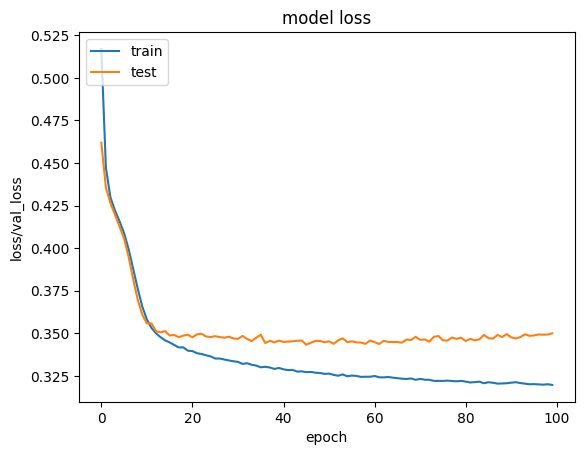

In [153]:
plt.plot(new_history.history['loss'])
plt.plot(new_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss/val_loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

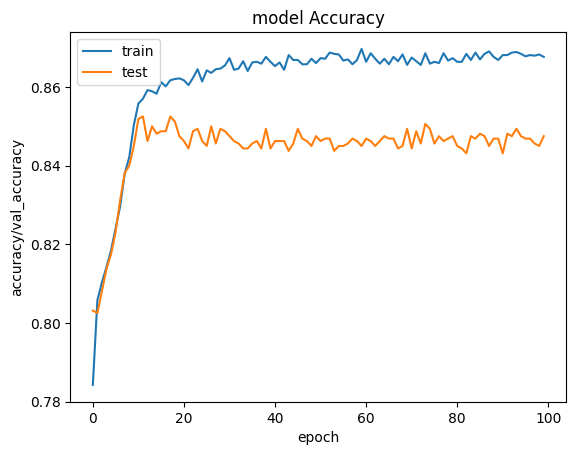

In [156]:
plt.plot(new_history.history['accuracy'])
plt.plot(new_history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('accuracy/val_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

**Model Overfitting**

In model there is ovefitting which we remove using regularization techniques but for now we just learn ANN how it update working not making a accurate model